In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import numpy as np
import json
from scipy.spatial.transform import Rotation as R

In [2]:
with open('./solo_1/sequence.0/step0.frame_data.json') as json_file:
    data = json.load(json_file)

In [36]:
captures = data['captures']
def get_location(view):
    # coeff = np.array([-0.00389254, 0.49512566, 0.13212298])
    def _find(l, s):
        for elem in l:
            if elem['id'] == s or elem['id'] == f'{s}_0':
                return elem['values'][0]
    
    bbox_3d, bbox_2d = _find(view['annotations'], 'bounding box 3D'), _find(view['annotations'], 'bounding box')
    
    # refine 3D location of the object
    euler = R.from_quat(bbox_3d.get('rotation')).as_matrix()
    obj_location = view.get('position') + np.dot(bbox_3d['translation'], euler)

    # pre-process 2D bbox
    bbox = {
        'center': np.array(bbox_2d['origin']) + np.array(bbox_2d['dimension'])/2,
        'size': np.array(bbox_2d['dimension'])/2,
        # 'center': np.array(bbox_2d['origin']) + np.array(bbox_2d['dimension'])/2,
        # 'size': np.array(bbox_2d['dimension'])/2,
    }

    return {
        '3D_location': obj_location,
        'bboxes': bbox,
        'filename': view['filename']
    }

output = get_location(captures[0])
# output_2 = get_location(captures[1])

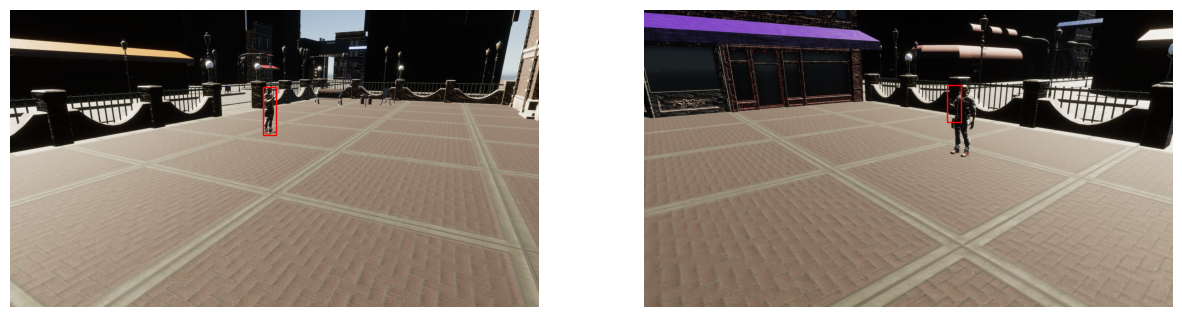

In [37]:
n_view = len(output['bboxes'])
fig, ax = plt.subplots(1, 2, figsize=(15, 15*n_view))
for i in range(n_view):
    ax[i].imshow(mpimg.imread(f'./solo_1/sequence.0/{output[i]["filename"]}'))
    ax[i].add_patch(
        patches.Rectangle(
            output[i]['bbox']['center'] - np.array([output[i]['bbox']['size'][0], output[i]['bbox']['size'][1]]),
            2*output[i]['bbox']['size'][0], 2*output[i]['bbox']['size'][1],
            linewidth=1, edgecolor='r', facecolor='none'
        )
    )
    ax[i].axis('off')

plt.show()

In [5]:
obj_1

{'@type': 'type.unity.com/unity.solo.RGBCamera',
 'id': 'camera_0',
 'description': '',
 'position': [8.0, 2.5, 3.0],
 'rotation': [-0.0695865452, 0.857597351, -0.120527431, -0.495134056],
 'velocity': [0.0, 0.0, 0.0],
 'acceleration': [0.0, 0.0, 0.0],
 'filename': 'step0.camera_0.png',
 'imageFormat': 'Png',
 'dimension': [3840.0, 2160.0],
 'projection': 'Perspective',
 'matrix': [1.111111, 0.0, 0.0, 0.0, 1.97530854, 0.0, 0.0, 0.0, -1.0006001],
 'annotations': [{'@type': 'type.unity.com/unity.solo.BoundingBox2DAnnotation',
   'id': 'bounding box_0',
   'sensorId': 'camera',
   'description': "Produces 2D bounding box annotations for all visible objects that bear a label defined in this labeler's associated label configuration.",
   'values': [{'instanceId': 2,
     'labelId': 2,
     'labelName': 'human',
     'origin': [1837.0, 558.0],
     'dimension': [94.0, 352.0]}]},
  {'@type': 'type.unity.com/unity.solo.BoundingBox3DAnnotation',
   'id': 'bounding box 3D_0',
   'sensorId': 'cam

In [6]:
obj_2_3d

{'instanceId': 2,
 'labelId': 2,
 'labelName': 'human',
 'translation': [1.35032189, 0.960106254, 7.696381],
 'size': [0.7377897, 1.84917212, 0.57667625],
 'rotation': [-0.06412003, -0.895216167, 0.136931345, 0.419197559],
 'velocity': [0.0, 0.0, 0.0],
 'acceleration': [0.0, 0.0, 0.0]}

In [8]:
camera = np.array([8.0, 2.5, 3.0])
camera_0 = np.array([-7.0, 2.5, 3.0])

euler = R.from_quat(obj_1_3d['rotation']).as_matrix()
euler_1 = R.from_quat(obj_2_3d['rotation']).as_matrix()

print('-'*30)
print(camera + np.dot(obj_1_3d['translation'], euler) - obj_1_3d['size']*np.array([0, .5, 0]))
# print(camera_0 + np.dot(obj_2_3d['translation'], euler_1) - obj_1_3d['size']*np.array([0, .5, 0]))

# print('-'*30)
# print(np.dot(obj_1_3d['translation']+camera, euler))
# print(np.dot(obj_2_3d['translation']+camera_0, euler_1))


------------------------------
[-2.00287218  0.19098648 -2.92380786]


In [9]:
euler = R.from_quat(obj_1_3d['rotation']).as_euler('xyz', degrees=True)
euler_1 = R.from_quat(obj_2_3d['rotation']).as_euler('xyz', degrees=True)

print(euler, euler_1)

[-150.1661307    56.35403839 -154.47935836] [-153.93210139  -47.13719653  160.27336472]


In [10]:
Y_true = np.array([1, 0.2, -2])
coeff = (camera + np.dot(obj_1_3d['translation'], euler) - Y_true)/obj_1_3d['size']
print(coeff)

print(camera + np.dot(obj_1_3d['translation'], euler) - obj_1_3d['size']*np.array(coeff))
print(camera + np.dot(obj_1_3d['translation'], euler) - obj_1_3d['size']*np.array([0, .5, 0]))

[-2240.81202124  -896.58926628 -2870.32433586]
[ 1.   0.2 -2. ]
[-1652.24787429 -1658.67246035 -1657.24787429]
